In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
import math
import numpy
import time
import sklearn
import scipy
from numpy import loadtxt
#Imports possibly useful software for Python
t=Table.read('NGC2264TGAS.vot')
#Defines t as this table
print("The columns within this catalog are: ")
print(t.colnames)
#Prints out all of the column names for easy reference

The columns within this catalog are: 
['_Glon', '_Glat', '_RAJ2000', '_DEJ2000', 'RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Epoch', 'Plx', 'e_Plx', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'Dup', '__Gmag_', 'GLON', 'GLAT']


In [2]:
NGC2264RA=t["RA_ICRS"]
NGC2264Dec=t["DE_ICRS"]
#Reads in the RA and Dec from columns in the table
print(NGC2264RA)
print(NGC2264Dec)
#Prints out the RA and Dec columns to look at

   RA_ICRS    
     deg      
--------------
100.6327707505
100.6398328086
100.4680952684
100.4510082323
100.4476071735
100.4648208441
100.4540007658
100.5560505427
100.5562984362
100.5462777786
           ...
100.3592483130
100.2370948238
100.2378267369
100.2282555322
100.2304252821
100.2347359260
100.2594053504
100.2138374049
100.2309625401
100.2276064814
Length = 31999 rows
   DE_ICRS    
     deg      
--------------
  8.9017042292
  8.9085747212
  8.9009073051
  8.9001460820
  8.9006585064
  8.9004479796
  8.9074642075
  8.9003747840
  8.9015303723
  8.9014491171
           ...
 10.4991714677
 10.4732182662
 10.4815485224
 10.4800883796
 10.4905333556
 10.4963763307
 10.4898754274
 10.4887503065
 10.4994506182
 10.4997749375
Length = 31999 rows


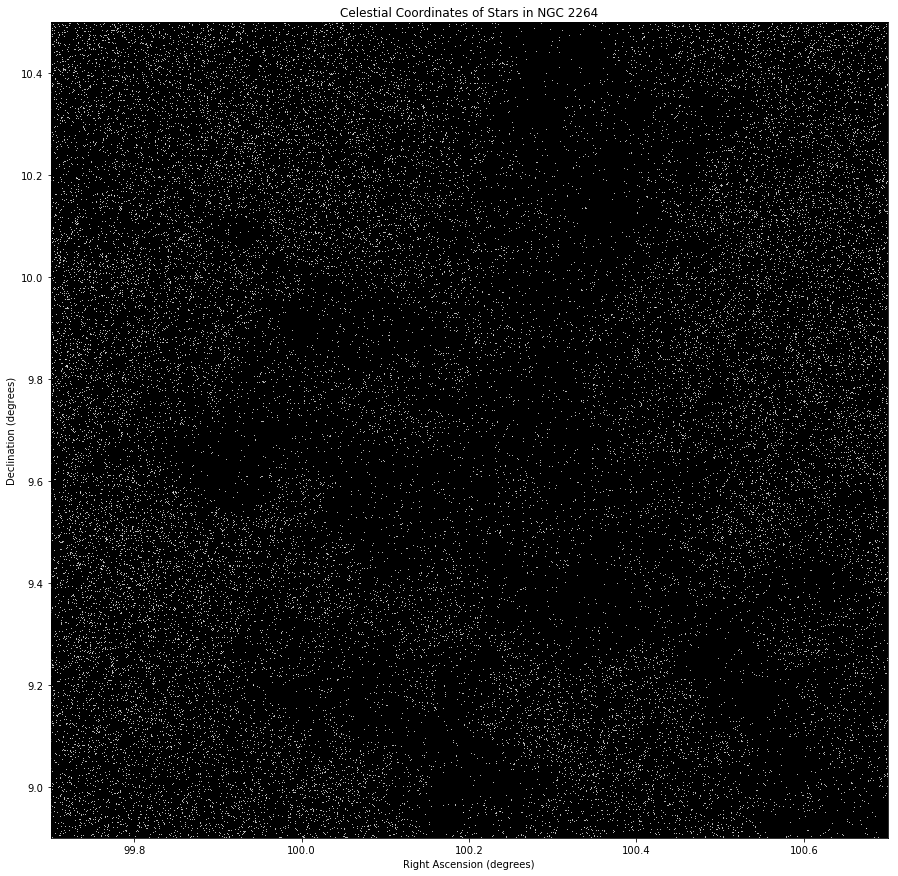

In [3]:
plt.rcParams['axes.facecolor']='black'
plt.rcParams['figure.figsize']=15,15
#Sets background color and figure size
NGC2264RA=t["RA_ICRS"]
NGC2264Dec=t["DE_ICRS"]
#Reads in the RA and Dec from columns in the table
plt.plot(NGC2264RA,NGC2264Dec,color='xkcd:white',linestyle='None',marker='*',markersize=0.2)
#Plots coordinates as white stars with no lines
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('Celestial Coordinates of Stars in NGC 2264')
#Adds appropriate labels and title
plt.xlim([99.70,100.70])
plt.ylim([8.90,10.50])
#Changes the plot limits to cut off edges
plt.show()

In [4]:
NGC2264RAStDev=numpy.std(NGC2264RA)
NGC2264DecStDev=numpy.std(NGC2264Dec)
#Computes standard deviations of each array
NGC2264RAAverage=numpy.average(NGC2264RA)
NGC2264DecAverage=numpy.average(NGC2264Dec)
#Computes averages of each array
NGC2264StarRA=NGC2264RA-NGC2264RAAverage
NGC2264StarRA=NGC2264StarRA/NGC2264RAStDev
#Shifts and normalizes the RA so it is easy to work with
NGC2264StarDec=NGC2264Dec-NGC2264DecAverage
NGC2264StarDec=NGC2264StarDec/NGC2264DecStDev
#Shifts and normalizes the Dec so it is easy to work with

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  after removing the cwd from sys.path.
/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.
  """


In [5]:
NGC2264RAPixels=numpy.linspace(99.70,100.70,1001)
NGC2264DecPixels=numpy.linspace(8.90,10.50,1001)
#Creates linearly spaced pixel arrays for next step
NGC2264RAPixels=NGC2264RAPixels-NGC2264RAAverage
NGC2264RAPixels=NGC2264RAPixels/NGC2264RAStDev
#Shifts and normalizes the RA pixels to match the format
NGC2264DecPixels=NGC2264DecPixels-NGC2264DecAverage
NGC2264DecPixels=NGC2264DecPixels/NGC2264DecStDev
#Shifts and normalizes the Dec pixels to match the format
Pixels=numpy.zeros([1001,1001])
#Creates 1001x1001 matrix of zeros for next step

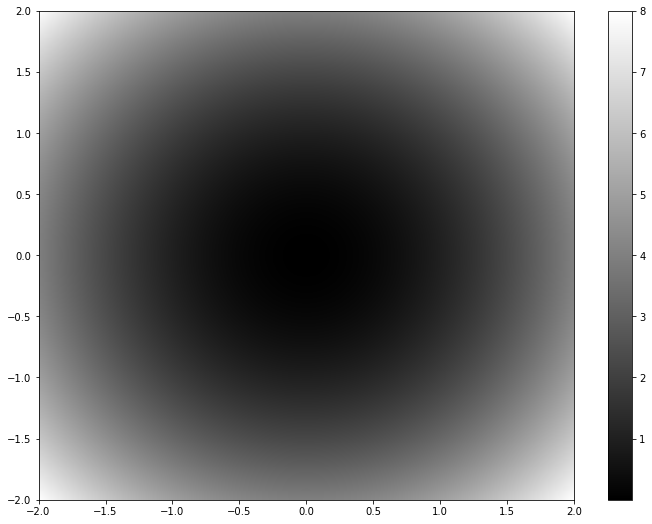

In [6]:
x=numpy.linspace(-2,2,1000)
y=numpy.linspace(-2,2,1000)
z=numpy.array([i*i+j*j for i in x for j in y])
X,Y=numpy.meshgrid(x,y)
Z=z.reshape(1000,1000)
plt.rcParams['figure.figsize']=12,9
plt.pcolormesh(X,Y,Z,cmap='gist_gray')
plt.colorbar()
plt.show()

In [7]:
tic=time.time()
from sklearn.neighbors import NearestNeighbors
NGC2264RAPixels=numpy.asarray(NGC2264RAPixels)
NGC2264DecPixels=numpy.asarray(NGC2264DecPixels)
Gridx=numpy.array([])
Gridy=numpy.array([])
l=len(NGC2264RAPixels)
rows=l*l
Grid=numpy.zeros((rows,2))
for i in range(0,l):
    for j in range(0,l):
        Gridx=numpy.append(Gridx,NGC2264RAPixels[i])
for i in range(0,l):
    Gridy=numpy.append(Gridy,NGC2264DecPixels)
Grid=numpy.vstack((Gridx,Gridy))
Grid=numpy.transpose(Grid)
Stars=numpy.vstack((NGC2264StarRA,NGC2264StarDec))
Stars=numpy.transpose(Stars)
neighbors=NearestNeighbors(n_neighbors=6,algorithm='auto').fit(Stars)
distance,indices=neighbors.kneighbors(Grid,2)
'''print('distance')
print(distance)
print('**************************')
print('indices')
print(indices)
print('**************************')'''
print('Done')
toc=time.time()
ElapsedTime=toc-tic
ElapsedTimeMinutes=ElapsedTime/60
print('Elapsed Time:',ElapsedTime,'seconds')
print('Elapsed Time:',ElapsedTimeMinutes,'minutes')

Done
Elapsed Time: 868.5166807174683 seconds
Elapsed Time: 14.475278011957805 minutes


In [8]:
*
tic=time.time()
for x in range(0,len(NGC2264RAPixels)):
    for y in range(0,len(NGC2264DecPixels)):
        EuclideanDistance=numpy.array([])
        #Makes empty array of the distance to each star
        for i in range(0,len(NGC2264RA)):
            EuclideanDistance=numpy.append(EuclideanDistance,numpy.sqrt(numpy.square(NGC2264RA[i]-NGC2264RAPixels[x])+numpy.square(NGC2264Dec[i]-NGC2264DecPixels[y])))
            #Uses the distance formula to calculate distance to every star
        #NearestNeighborIndex=numpy.where(EuclideanDistance==numpy.minimum(EuclideanDistance))
        NearestNeighborDistance=numpy.min(EuclideanDistance)
        #Finds the minimum distance (distance to nearest neighbor)
        Pixels[y,x]=NearestNeighborDistance
        #Assigns that pixels matrix element to be the nearest neighbor distance
toc=time.time()
ElapsedTime=toc-tic
print("Elapsed Time: ",ElapsedTime)

SyntaxError: invalid syntax (<ipython-input-8-cd93e0886083>, line 1)

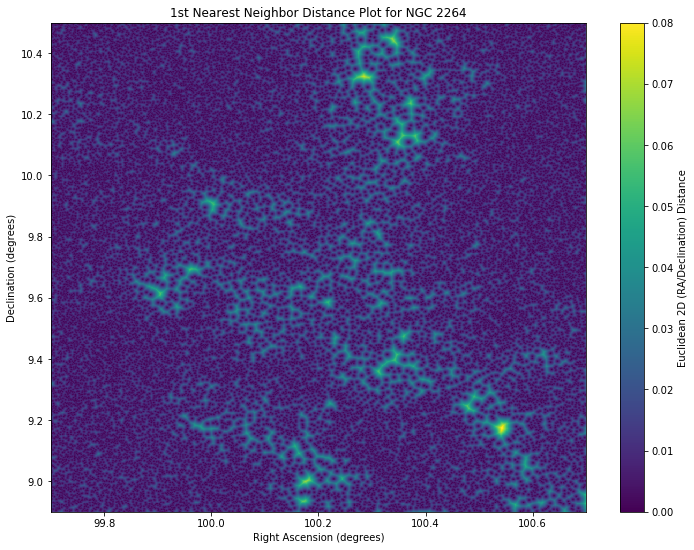

Elapsed Time: 1.64628267288208 seconds


In [9]:
tic=time.time()
x=numpy.linspace(99.70,100.70,len(NGC2264RAPixels))
y=numpy.linspace(8.90,10.50,len(NGC2264RAPixels))
X,Y=numpy.meshgrid(x,y)
plt.rcParams['figure.figsize']=12,9
firstdistances=distance[:,0]
FirstDistances=numpy.reshape(firstdistances,(-1,len(NGC2264RAPixels)))
FirstDistances=numpy.transpose(FirstDistances)
plt.pcolormesh(X,Y,FirstDistances,cmap='viridis',vmin=0,vmax=0.08)
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('1st Nearest Neighbor Distance Plot for NGC 2264')
cbar=plt.colorbar()
cbar.set_label('Euclidean 2D (RA/Declination) Distance',rotation='90')
plt.show()
toc=time.time()
ElapsedTime=toc-tic
print("Elapsed Time:",ElapsedTime,'seconds')

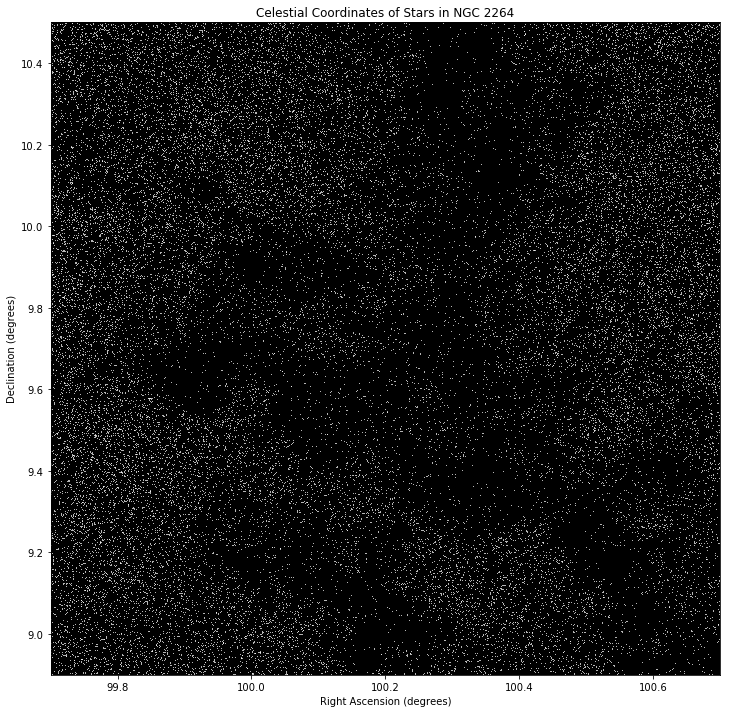

In [10]:
plt.rcParams['axes.facecolor']='black'
plt.rcParams['figure.figsize']=12,12
#Sets background color and figure size
NGC2264RA=t["RA_ICRS"]
NGC2264Dec=t["DE_ICRS"]
#Reads in the RA and Dec from columns in the table
plt.plot(NGC2264RA,NGC2264Dec,color='xkcd:white',linestyle='None',marker='*',markersize=0.2)
#Plots coordinates as white stars with no lines
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('Celestial Coordinates of Stars in NGC 2264')
#Adds appropriate labels and title
plt.xlim([99.70,100.70])
plt.ylim([8.90,10.50])
#Changes the plot limits to cut off edges
plt.show()

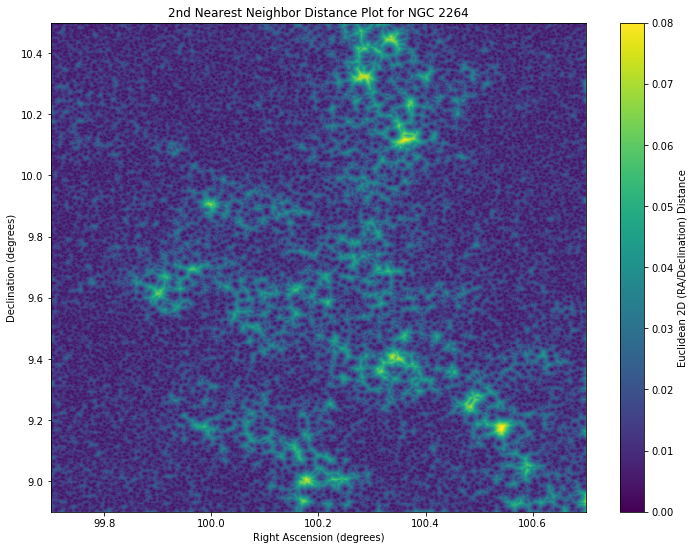

Elapsed Time: 1.653092622756958 seconds


In [11]:
tic=time.time()
x=numpy.linspace(99.70,100.70,len(NGC2264RAPixels))
y=numpy.linspace(8.90,10.50,len(NGC2264RAPixels))
X,Y=numpy.meshgrid(x,y)
plt.rcParams['figure.figsize']=12,9
seconddistances=distance[:,1]
SecondDistances=numpy.reshape(seconddistances,(-1,len(NGC2264RAPixels)))
SecondDistances=numpy.transpose(SecondDistances)
plt.pcolormesh(X,Y,SecondDistances,cmap='viridis',vmin=0,vmax=0.08)
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('2nd Nearest Neighbor Distance Plot for NGC 2264')
cbar=plt.colorbar()
cbar.set_label('Euclidean 2D (RA/Declination) Distance',rotation='90')
plt.show()
toc=time.time()
ElapsedTime=toc-tic
print("Elapsed Time:",ElapsedTime,'seconds')

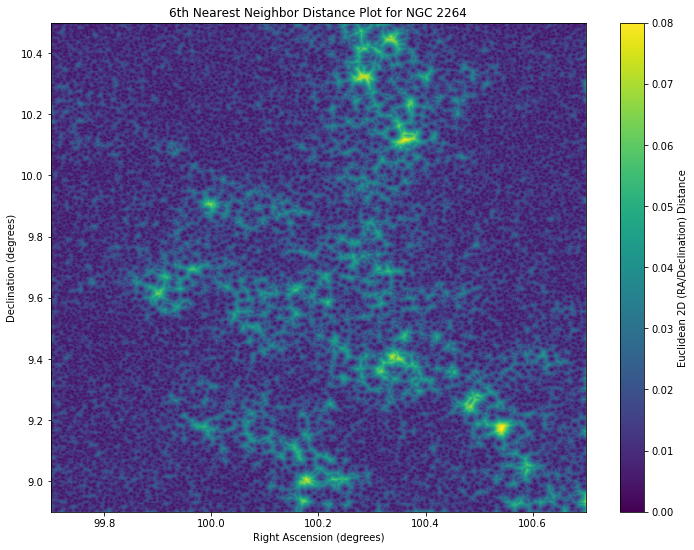

Elapsed Time: 1.6417815685272217 seconds


In [12]:
tic=time.time()
x=numpy.linspace(99.70,100.70,len(NGC2264RAPixels))
y=numpy.linspace(8.90,10.50,len(NGC2264RAPixels))
X,Y=numpy.meshgrid(x,y)
plt.rcParams['figure.figsize']=12,9
sixthdistances=distance[:,1]
#Figure out how to get 6th nearest neighbor
SixthDistances=numpy.reshape(sixthdistances,(-1,len(NGC2264RAPixels)))
SixthDistances=numpy.transpose(SixthDistances)
plt.pcolormesh(X,Y,SixthDistances,cmap='viridis',vmin=0,vmax=0.08)
plt.xlabel('Right Ascension (degrees)')
plt.ylabel('Declination (degrees)')
plt.title('6th Nearest Neighbor Distance Plot for NGC 2264')
cbar=plt.colorbar()
cbar.set_label('Euclidean 2D (RA/Declination) Distance',rotation='90')
plt.show()
toc=time.time()
ElapsedTime=toc-tic
print("Elapsed Time:",ElapsedTime,'seconds')

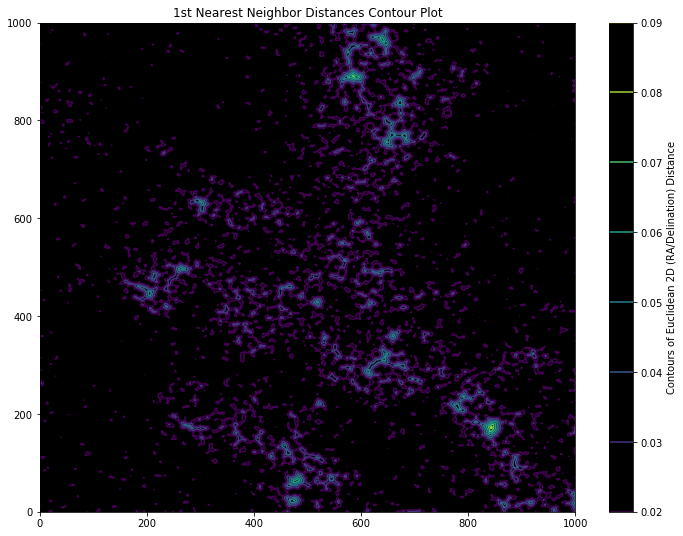

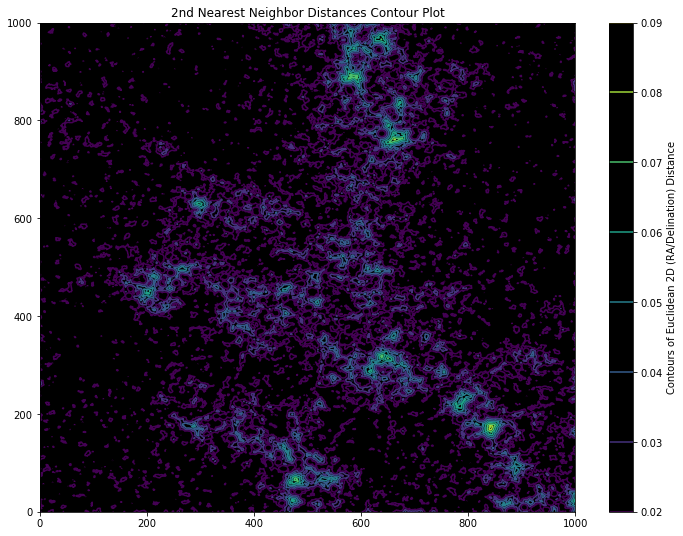

In [13]:
FirstDistancesMinimumLevel=numpy.min(FirstDistances)
SecondDistancesMinimumLevel=numpy.min(SecondDistances)
FirstDistancesMaximumLevel=numpy.max(FirstDistances)
SecondDistancesMaximumLevel=numpy.max(SecondDistances)
FirstDistancesAverageLevel=numpy.average(FirstDistances)
SecondDistancesAverageLevel=numpy.average(SecondDistances)
V1=numpy.linspace(0.02,0.09,8)
plt.rcParams['figure.figsize']=12,9
plt.contour(FirstDistances,V1)
cbar=plt.colorbar()
cbar.set_label('Contours of Euclidean 2D (RA/Delination) Distance',rotation='90')
plt.title('1st Nearest Neighbor Distances Contour Plot')
plt.show()
V2=numpy.linspace(0.02,0.09,8)
plt.rcParams['figure.figsize']=12,9
plt.contour(SecondDistances,V2)
cbar=plt.colorbar()
cbar.set_label('Contours of Euclidean 2D (RA/Delination) Distance',rotation='90')
plt.title('2nd Nearest Neighbor Distances Contour Plot')
plt.show()

In [14]:
Gmag=t["__Gmag_"]
Parallax=t["Plx"]
ParallaxError=t["e_Plx"]
#Reads in quantities from the data table
DistanceRaw=1000./Parallax
Distance=numpy.array([])
for i in range(0,len(DistanceRaw)):
    if DistanceRaw[i]<=1000:
        Distance=numpy.append(Distance,DistanceRaw[i])
#Average absolute magnitude of F spectral type stars taken to be +2.6 in visual (G applies here)
#Uncertainty in this absolute F magnitude is 0.9 magnitudes
#http://adsabs.harvard.edu/full/1966AJ.....71..517M
M=5
IntermediateStep=(1/5)*(Gmag-M+5)
tens=10*numpy.ones(len(Gmag))
SpectralDistance=numpy.power(tens,IntermediateStep)
SpectralDistanceSpecial=numpy.array([])
for i in range(0,len(SpectralDistance)):
    if SpectralDistance[i]<=1000:
        SpectralDistanceSpecial=numpy.append(SpectralDistanceSpecial,SpectralDistanceRaw[i])
    if SpectralDistance[i]>1000:
        SpectralDistance[i]=1e6
SpectralDistanceAverage=numpy.average(SpectralDistanceSpecial)
SpectralDistanceStDev=numpy.std(SpectralDistanceSpecial)
SpectralDistance=SpectralDistance-SpectralDistanceAverage
SpectralDistance=SpectralDistance/SpectralDistanceStDev
NGC2264DistancePixels=numpy.linspace(0,1000,5)
NGC2264DistancePixels=NGC2264DistancePixels-SpectralDistanceAverage
NGC2264DistancePixels=NGC2264DistancePixels/SpectralDistanceStDev
print('Spectral Distance Minimum (pc):',numpy.min(SpectralDistance))
print('Spectral Distance Average (pc):',numpy.average(SpectralDistance))
print('Spectral Distance Maximum (pc):',numpy.max(SpectralDistance))
print('Parallax Distance Minimum (pc):',numpy.min(Distance))
print('Parallax Distance Average (pc):',numpy.average(Distance))
print('Parallax Distance Maximum (pc):',numpy.max(Distance))

Spectral Distance Minimum (pc): 21.7570551182
Spectral Distance Average (pc): 5866.8477375
Spectral Distance Maximum (pc): 15951.4539293
Parallax Distance Minimum (pc): 89.1265563965
Parallax Distance Average (pc): 574.397220177
Parallax Distance Maximum (pc): 980.392150879


/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.


In [53]:
NGC2264RAPixels=numpy.linspace(99.70,100.70,5)
NGC2264DecPixels=numpy.linspace(8.90,10.50,5)
#Creates linearly spaced pixel arrays for next step
NGC2264RAPixels=NGC2264RAPixels-NGC2264RAAverage
NGC2264RAPixels=NGC2264RAPixels/NGC2264RAStDev
#Shifts and normalizes the RA pixels to match the format
NGC2264DecPixels=NGC2264DecPixels-NGC2264DecAverage
NGC2264DecPixels=NGC2264DecPixels/NGC2264DecStDev
#Shifts and normalizes the Dec pixels to match the format
Pixels=numpy.zeros([5,5,5])
#Creates 5x5x5 matrix of zeros for next step
DistanceStDev=numpy.std(Distance)
DistanceAverage=numpy.average(Distance)
Distance=Distance-DistanceAverage
Distance=Distance/DistanceStDev
#Shifts and normalizes distance data to match format of other data
InitialTime=time.time()
ThreeDimensionalNearestNeighborDistance=numpy.array([])
count=0
total=numpy.power(len(NGC2264RAPixels),3)
for x in range(0,len(NGC2264RAPixels)):
    for y in range(0,len(NGC2264DecPixels)):
        for z in range(0,len(NGC2264DistancePixels)):
            tic=time.time()
            EuclideanDistance=numpy.array([])
            #Makes empty array of the distance to each star
            for i in range(0,len(NGC2264RA)):
                EuclideanDistance=numpy.append(EuclideanDistance,numpy.sqrt(numpy.square(NGC2264StarRA[i]-NGC2264RAPixels[x])+numpy.square(NGC2264StarDec[i]-NGC2264DecPixels[y])+numpy.square(SpectralDistance[i]-NGC2264DistancePixels[z])))
                #Uses the distance formula to calculate distance to every star
            #NearestNeighborIndex=numpy.where(EuclideanDistance==numpy.minimum(EuclideanDistance))
            NearestNeighborDistance=numpy.min(EuclideanDistance)
            #Finds the minimum distance (distance to nearest neighbor)
            ThreeDimensionalNearestNeighborDistance=numpy.append(ThreeDimensionalNearestNeighborDistance,NearestNeighborDistance)
            Pixels[y,x,z]=NearestNeighborDistance
            #Assigns that pixels matrix element to be the nearest neighbor distance
            count=count+1
            print('Pixel',count,'out of',total,'Done')
            print('Pixel',count,'Nearest Neighbor Distance:',NearestNeighborDistance)
            toc=time.time()
            EachPixelTime=toc-tic
            print('Elapsed Time for Pixel:',EachPixelTime,'seconds')
FinalTime=time.time()
ElapsedTime=FinalTime-InitialTime
print('Elapsed Time:',ElapsedTime,'seconds')
ElapsedTimeMinutes=ElapsedTime/60
print('Elapsed Time:',ElapsedTimeMinutes,'minutes')

/astromake/opt/python/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: np.average currently does not preserve subclasses, but will do so in the future to match the behavior of most other numpy functions such as np.mean. In particular, this means calls which returned a scalar may return a 0-d subclass object instead.


Pixel 1 out of 125 Done
Pixel 1 Nearest Neighbor Distance: 0.592965893472
Elapsed Time for Pixel: 8.69749402999878 seconds
Pixel 2 out of 125 Done
Pixel 2 Nearest Neighbor Distance: 0.304018614095
Elapsed Time for Pixel: 8.819770336151123 seconds
Pixel 3 out of 125 Done
Pixel 3 Nearest Neighbor Distance: 0.148576953164
Elapsed Time for Pixel: 8.767776727676392 seconds
Pixel 4 out of 125 Done
Pixel 4 Nearest Neighbor Distance: 0.273854215313
Elapsed Time for Pixel: 8.915811777114868 seconds
Pixel 5 out of 125 Done
Pixel 5 Nearest Neighbor Distance: 0.192328856615
Elapsed Time for Pixel: 8.816046476364136 seconds
Pixel 6 out of 125 Done
Pixel 6 Nearest Neighbor Distance: 0.480675320201
Elapsed Time for Pixel: 8.926253080368042 seconds
Pixel 7 out of 125 Done
Pixel 7 Nearest Neighbor Distance: 0.296092374102
Elapsed Time for Pixel: 8.87952446937561 seconds
Pixel 8 out of 125 Done
Pixel 8 Nearest Neighbor Distance: 0.176974616424
Elapsed Time for Pixel: 9.031739473342896 seconds
Pixel 9 ou

Pixel 67 out of 125 Done
Pixel 67 Nearest Neighbor Distance: 0.133637218279
Elapsed Time for Pixel: 8.695309400558472 seconds
Pixel 68 out of 125 Done
Pixel 68 Nearest Neighbor Distance: 0.131769240518
Elapsed Time for Pixel: 8.79366946220398 seconds
Pixel 69 out of 125 Done
Pixel 69 Nearest Neighbor Distance: 0.144750841983
Elapsed Time for Pixel: 8.732398986816406 seconds
Pixel 70 out of 125 Done
Pixel 70 Nearest Neighbor Distance: 0.0818789478503
Elapsed Time for Pixel: 8.910406112670898 seconds
Pixel 71 out of 125 Done
Pixel 71 Nearest Neighbor Distance: 0.288689265326
Elapsed Time for Pixel: 8.803081512451172 seconds
Pixel 72 out of 125 Done
Pixel 72 Nearest Neighbor Distance: 0.370057788053
Elapsed Time for Pixel: 8.904476881027222 seconds
Pixel 73 out of 125 Done
Pixel 73 Nearest Neighbor Distance: 0.30494463884
Elapsed Time for Pixel: 8.837305545806885 seconds
Pixel 74 out of 125 Done
Pixel 74 Nearest Neighbor Distance: 0.241664598266
Elapsed Time for Pixel: 8.954723834991455 s

In [ ]:
import scipy
NGC2264RAPixels=numpy.asarray(NGC2264RAPixels)
NGC2264DecPixels=numpy.asarray(NGC2264DecPixels)
NGC2264DistancePixels=numpy.asarray(NGC2264DistancePixels)
StarArray=numpy.vstack((NGC2264StarRA,NGC2264StarDec,SpectralDistance))
StarArray=numpy.transpose(StarArray)










PixelArray=numpy.vstack((Gridx,Gridy,))


from sklearn.neighbors import NearestNeighbors

Gridx=numpy.array([])
Gridy=numpy.array([])
Gridz=numpy.array([])
l=len(NGC2264RAPixels)
rows=l*l*l
Grid=numpy.zeros((rows,3))
for i in range(0,l):
    for j in range(0,l):
        for k in range(0,l):
            Gridx=numpy.append(Gridx,NGC2264RAPixels[i])
for i in range(0,l):
    for j in range(0,l):
        for k in range(0,l):
            Gridy=numpy.append(Gridy,NGC2264DecPixels)


for i in range(0,l):
    for j in range(0,l):
        Gridx=numpy.append(Gridx,NGC2264RAPixels[i])
for i in range(0,l):
    Gridy=numpy.append(Gridy,NGC2264DecPixels)
    
    
    
    

Grid=numpy.vstack((Gridx,Gridy))
Grid=numpy.transpose(Grid)
Stars=numpy.vstack((NGC2264StarRA,NGC2264StarDec))
Stars=numpy.transpose(Stars)
neighbors=NearestNeighbors(n_neighbors=6,algorithm='auto').fit(Stars)
distance,indices=neighbors.kneighbors(Grid,2)
'''print('distance')
print(distance)
print('**************************')
print('indices')
print(indices)
print('**************************')'''
print('Done')

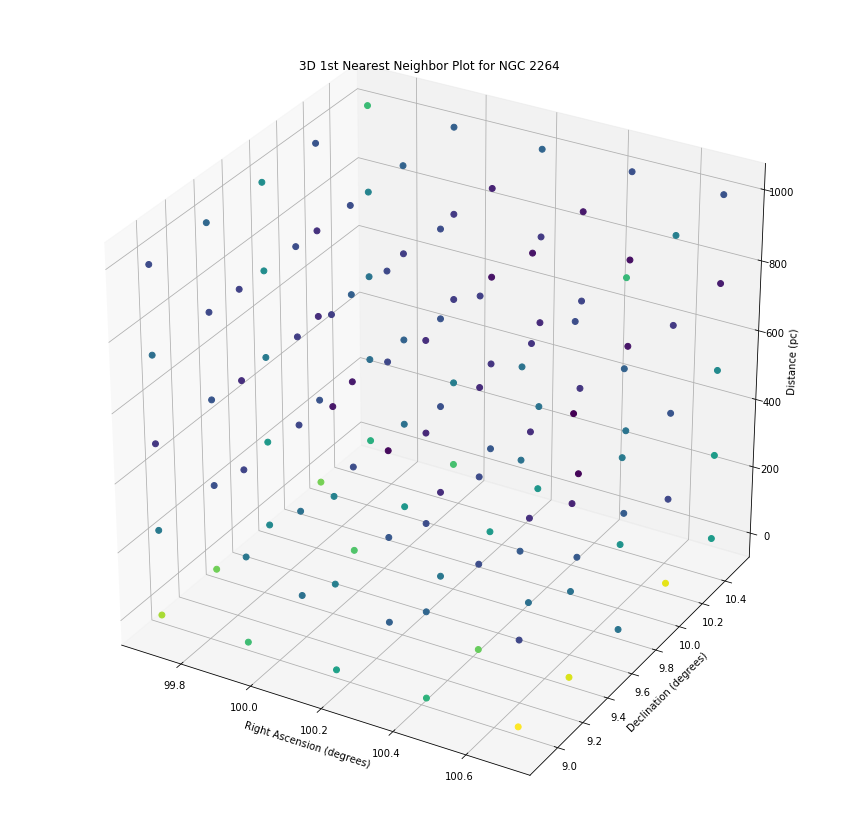

"zline=numpy.linspace(0,15,1000)\nxline=numpy.sin(zline)\nyline=numpy.cos(zline)\nax.plot3D(xline,yline,zline,color='xkcd:red')\nzdata=15*numpy.random.random(100)\nxdata=numpy.sin(zdata)+0.1*numpy.random.randn(100)\nydata=numpy.cos(zdata)+0.1*numpy.random.randn(100)\nax.scatter3D(xdata,ydata,zdata,c=ydata,cmap='Greens')"

In [56]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
fig=plt.figure()
ax=plt.axes(projection='3d')
Gridx=numpy.array([])
Gridy=numpy.array([])
Gridz=numpy.array([])
X=numpy.linspace(99.70,100.70,len(NGC2264RAPixels))
Y=numpy.linspace(8.90,10.50,len(NGC2264DecPixels))
Z=numpy.linspace(0,1000,len(NGC2264DistancePixels))
for x in range(0,len(NGC2264RAPixels)):
    for y in range(0,len(NGC2264DecPixels)):
        for z in range(0,len(NGC2264DistancePixels)):
            Gridx=numpy.append(Gridx,X[x])
            Gridy=numpy.append(Gridy,Y[y])
            Gridz=numpy.append(Gridz,Z[z])
plt.rcParams['figure.figsize']=15,15
plt.rcParams['axes.facecolor']='white'
ax.scatter3D(Gridx,Gridy,Gridz,c=Pixels,cmap='viridis',marker='o',s=35,alpha=1)
ax.set_xlabel('Right Ascension (degrees)')
ax.set_ylabel('Declination (degrees)')
ax.set_zlabel('Distance (pc)')
plt.title('3D 1st Nearest Neighbor Plot for NGC 2264')
plt.show()
'''fig=plt.figure()
ax=plt.axes(projection='3d')
ax.scatter3D(Gridx,Gridy,Gridz,c=Pixels,cmap='viridis',marker='o',s=35,alpha=1)
ax.view_init(60,270)
ax.set_xlabel('Right Ascension (degrees)')
ax.set_ylabel('Declination (degrees)')
ax.set_zlabel('Distance (pc)')
plt.title('3D 1st Nearest Neighbor Plot for NGC 2264')
plt.show()'''

#cbar=plt.colorbar()
#cbar.set_label('Euclidean 3D (RA/Dec/Distance) Distance',rotation='90')

'''zline=numpy.linspace(0,15,1000)
xline=numpy.sin(zline)
yline=numpy.cos(zline)
ax.plot3D(xline,yline,zline,color='xkcd:red')
zdata=15*numpy.random.random(100)
xdata=numpy.sin(zdata)+0.1*numpy.random.randn(100)
ydata=numpy.cos(zdata)+0.1*numpy.random.randn(100)
ax.scatter3D(xdata,ydata,zdata,c=ydata,cmap='Greens')'''

#Axes3D.scatter(xs=1,ys=1,zs=0,s=20)
#NGC2264RAPixels,NGC2264DecPixels,zs=0)               
#NGC2264DistancePixels)

In [18]:
#scipy.spatial.KDTree
#function to use?
#scipy.spatial.cKDTree
#function to use?
#scipy.stats.gaussian_kde
#function to use?

In [64]:
test=numpy.matrix([[1,2,3],[4,5,6],[7,8,9]])
print(test)
comparison=numpy.zeros([3,3])
print(comparison)
scipy.spatial.KDTree(test)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


In [ ]:
QFlags=t["Qfl"]
#Defines QFlags from the Qfl array
Jmag=t["Jmag"]
#Defines Jmag from the Jmag array
Hmag=t["Hmag"]
#Defines Hmag from the Hmag array
Kmag=t["Kmag"]
#Defines Kmag from the Kmag array
Vmag=t["VTmag"]
#Defines Vmag from the array VTmag in the table
Gmag=t["X.Gmag."]
#Defines Gmag from the __Gmag_ array
Bmag=t["BTmag"]
#Defines Bmag from the BTmag array
Jmagerror=t["e_Jmag"]
#Defines the J magnitude error from the table
Hmagerror=t["e_Hmag"]
#Defines the H magnitude error from the table
Kmagerror=t["e_Kmag"]
#Defines the K magnitude error from the table
for i in range(0,len(QFlags)):
    if(QFlags[i][0]==ord("A")):
         Jmag.mask[i]=False
         Jmagerror.mask[i]=False
    else:
         Jmag.mask[i]=True
         Jmagerror.mask[i]=True
         #SpType.mask[i]=True
#The first character of QFlags represents J. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).
for i in range(0,len(QFlags)):
    if(QFlags[i][1]==ord("A")):
         Hmag.mask[i]=False
         Hmagerror.mask[i]=False
    else:
         Hmag.mask[i]=True
         Hmagerror.mask[i]=True
         #SpType.mask[i]=True
#The second character of QFlags represents H. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).
for i in range(0,len(QFlags)):
    if(QFlags[i][2]==ord("A")):
         Kmag.mask[i]=False
         Kmagerror.mask[i]=False
    else:
         Kmag.mask[i]=True
         Kmagerror.mask[i]=True
         #SpType.mask[i]=True
#The third character of QFlags represents K. Checks whether the first character is A. If it is, the mask on that element
#should be false (off), and if it isn't, the mask on that element should be true (on).
Duplicates=t["Dup"]
#Defines Duplicates from the array of duplicates Dup in the table
DuplicateMask=0
for i in range(0,len(Duplicates)):
    if Duplicates[i]>0.5:
        DuplicateMask=DuplicateMask+1
        Row=t[i]
        Index=Row._index
        Columns=row._table.columns.values()
        for j in Columns:
            Columns.mask[i]=True
for k in range(0,len(Duplicates)):
    if Duplicates[k]>0.5:
        print(k,Duplicates[k])
Distance=1000./t["Plx"]
#Defines the distance to the stars in parsecs (pc)
RA=t["RAJ2000"]
Dec=t["DEJ2000"]
#Defines the celestial coordinates from the table
NGC2264RA=numpy.array([])
NGC2264Dec=numpy.array([])
#Creates empty arrays into which the NGC 2264 coordinates will be added
for i in range(0,len(RA)):
    if RA[i]>=99.70 and RA[i]<=100.70 and Dec[i]>=8.90 and Dec[i]<=10.50:
        NGC2264RA=numpy.append(NGC2264RA,RA[i])
        NGC2264Dec=numpy.append(NGC2264Dec,Dec[i])
#Checks if a star is within the coordinate bounds for NGC 2264 and, if it is, adds it to the coordinate arrays